In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")

In [2]:
df = pd.read_csv("winequality.csv", sep=';')

In [3]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,White,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,White,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,White,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,White,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,White,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


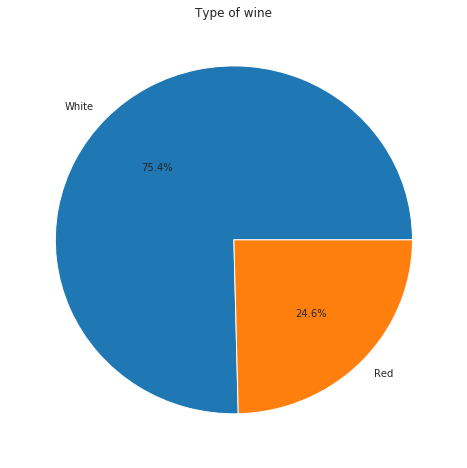

In [4]:
df['type'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(8,8), label='')
plt.title('Type of wine')
plt.show()

In [5]:
df.loc[df['type'] == 'White', 'type'] = 0
df.loc[df['type'] == 'Red', 'type'] = 1

In [6]:
df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
df.dtypes

type                      int64
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                  object
quality                   int64
dtype: object

In [8]:
df['alcohol'] = df['alcohol'].astype('str')
df = df.loc[df['alcohol'].str.len() < 5]
df['alcohol'] = df['alcohol'].astype(float)

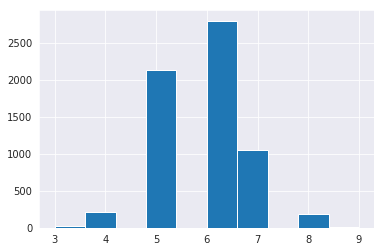

In [9]:
df['quality'].hist()
plt.show()

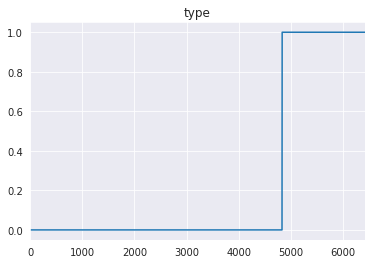

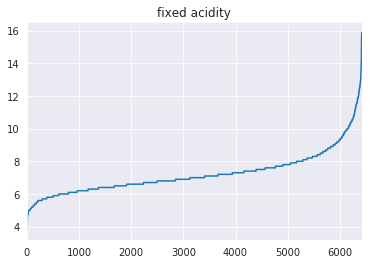

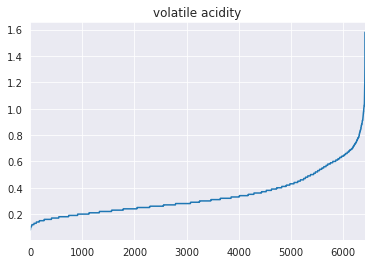

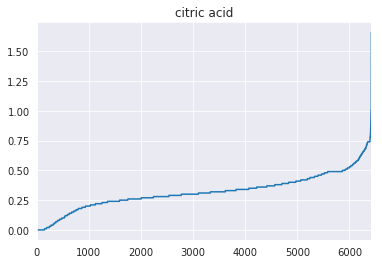

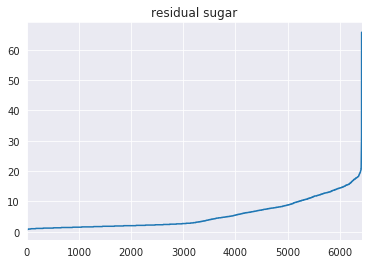

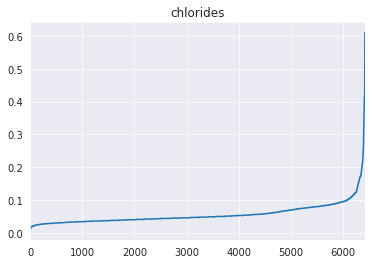

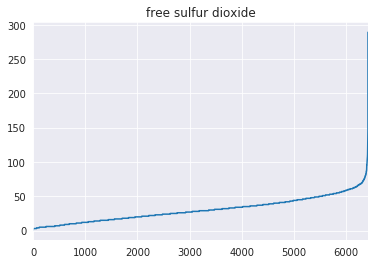

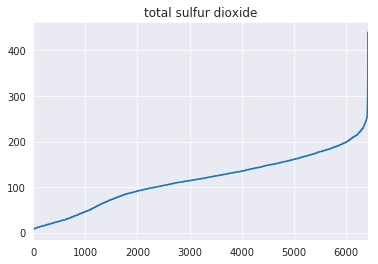

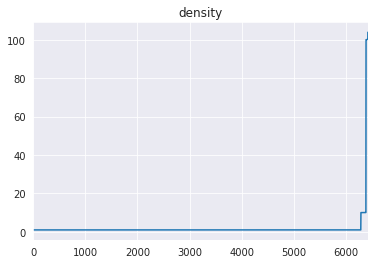

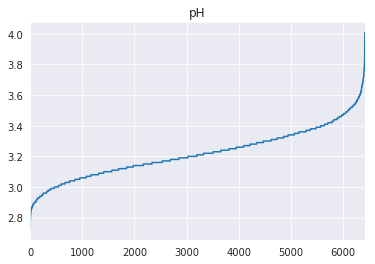

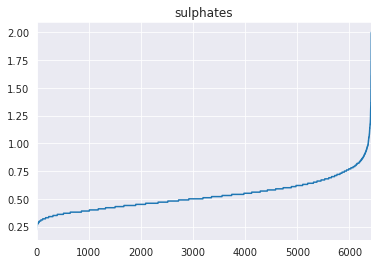

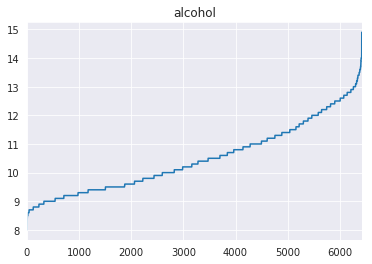

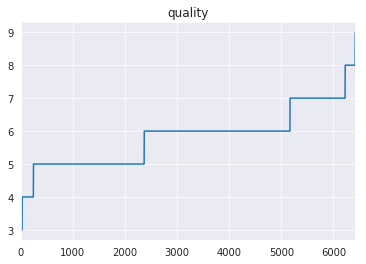

In [10]:
for i, col in enumerate(df.columns):
    df[col].sort_values().reset_index(drop=True).plot(fig=plt.figure(i))
    plt.title(col)

plt.show()

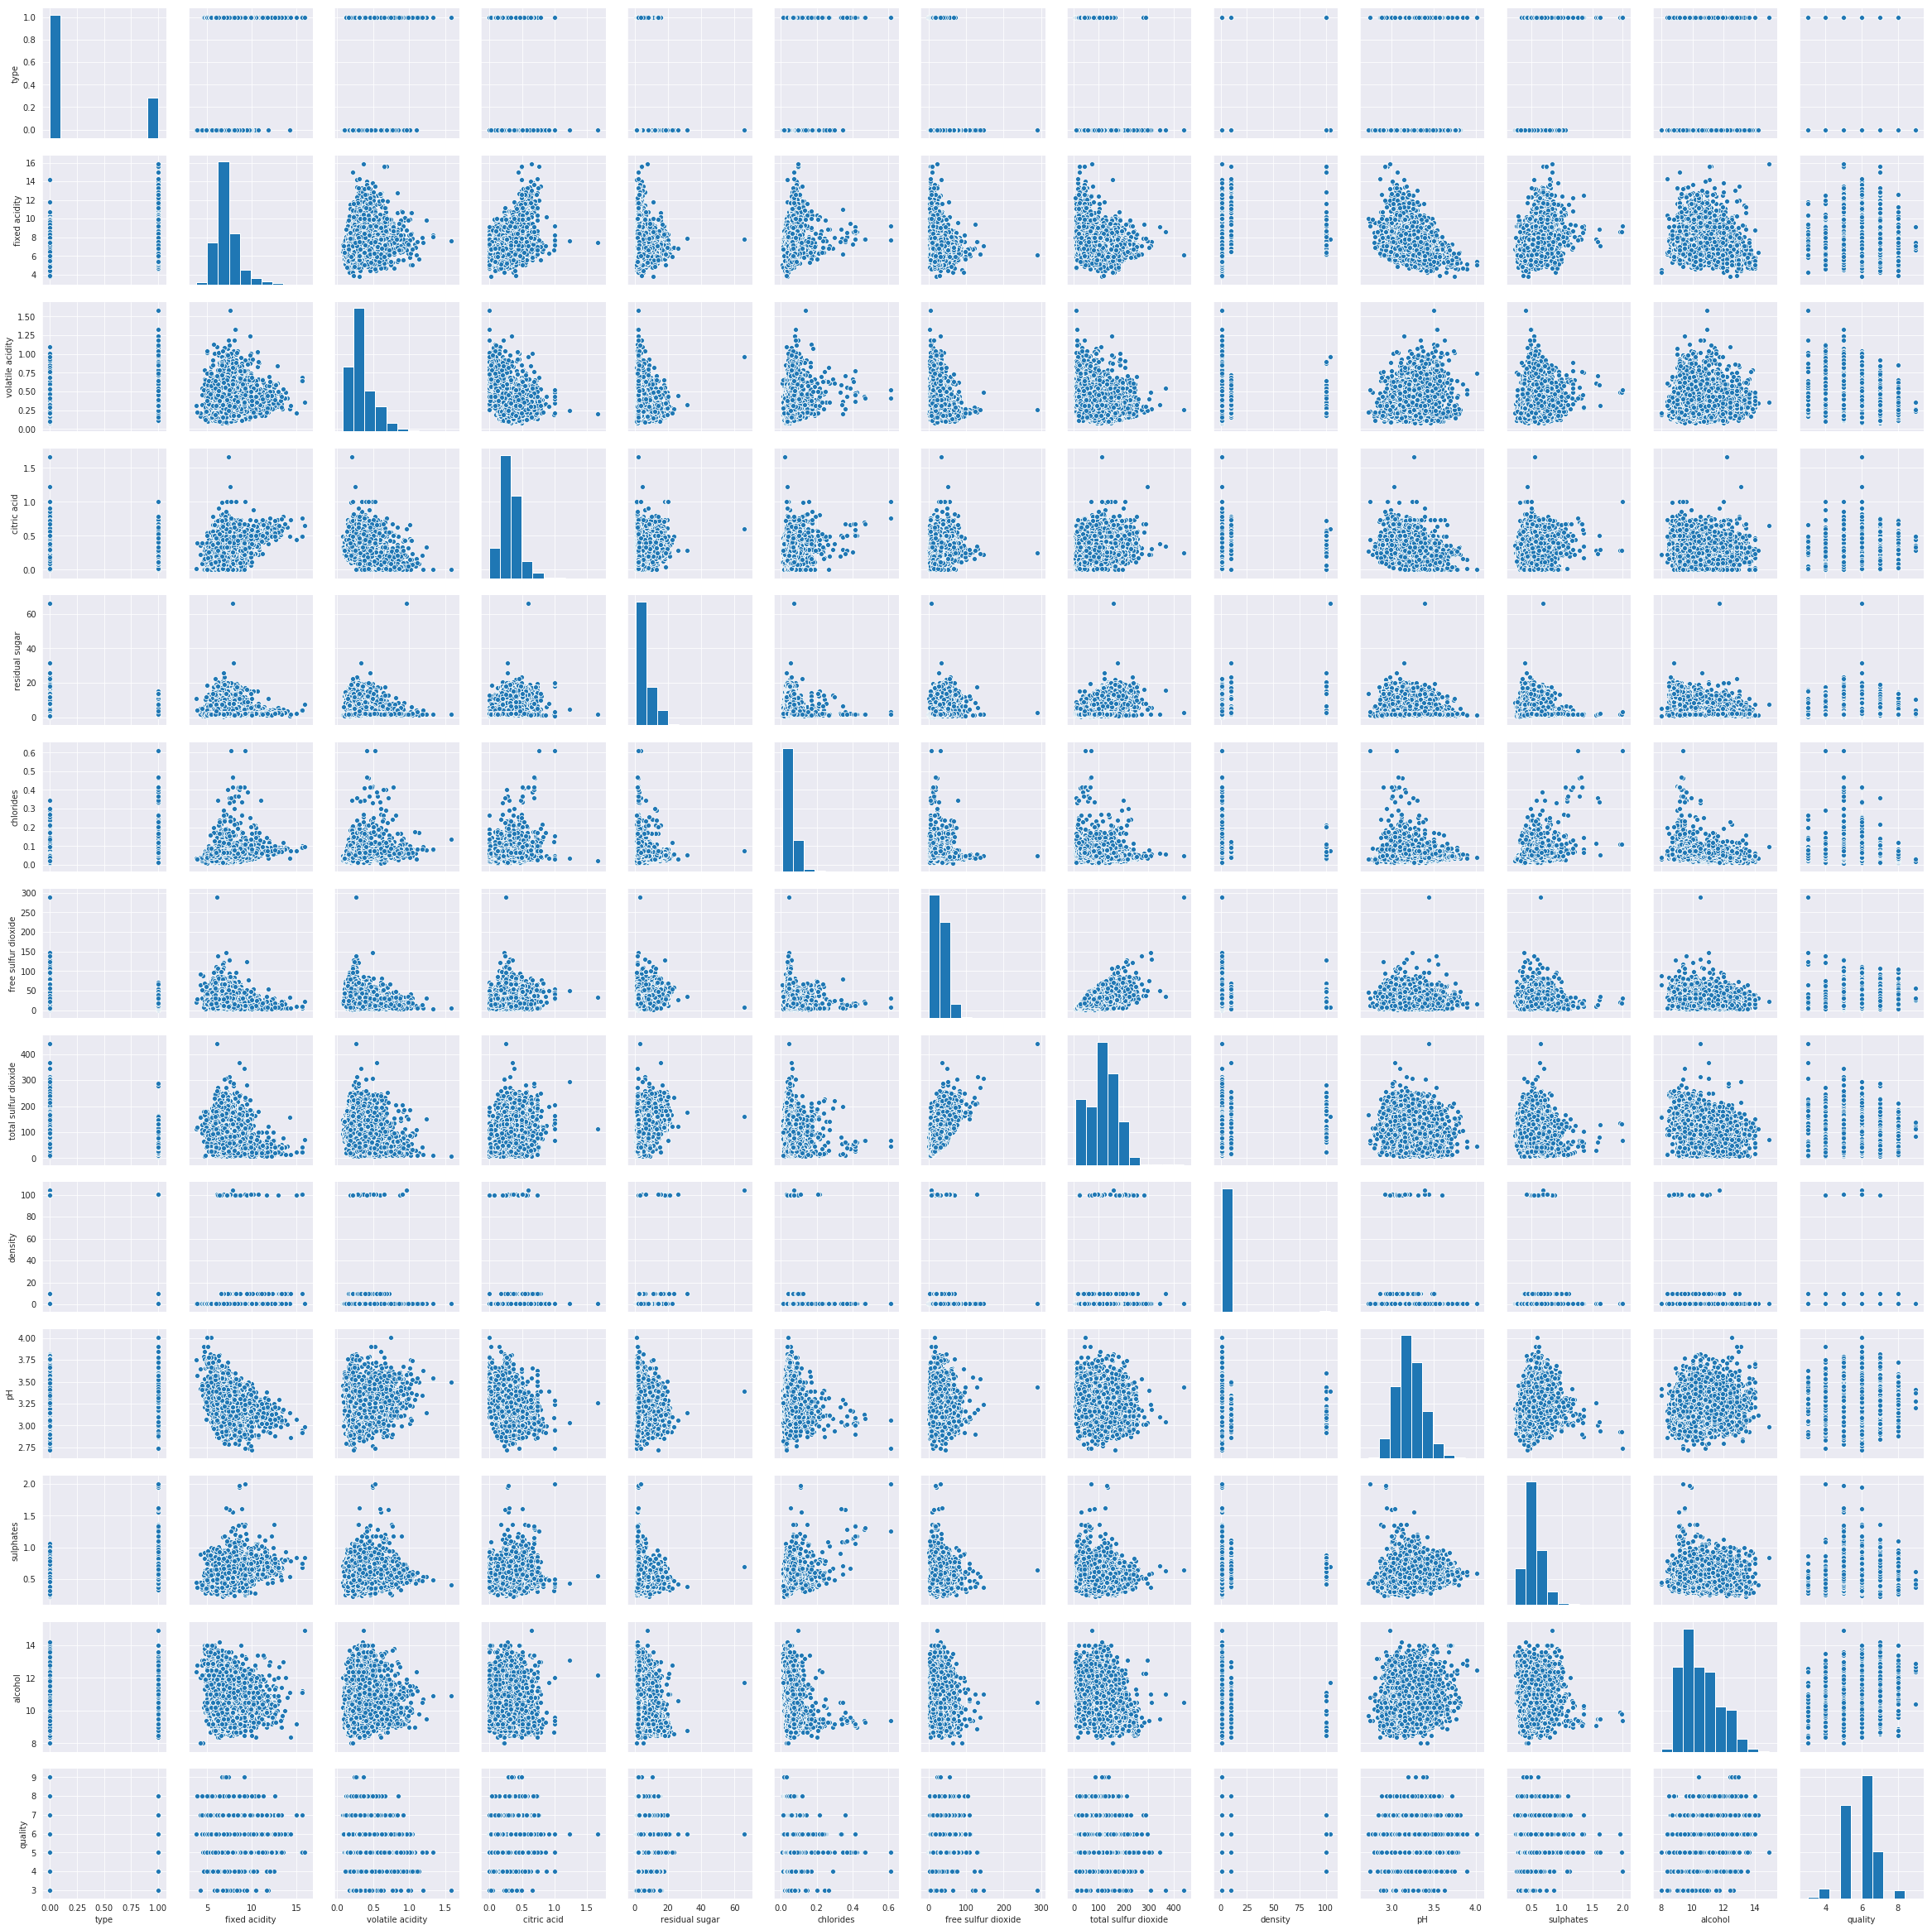

In [11]:
sns.pairplot(df)

In [12]:
df.describe()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6421.000000,6421.000000,6421.000000,6421.000000,6421.000000,6421.000000,6421.000000,6421.000000,6421.000000,6421.000000,6421.000000,6421.000000,6421.000000
mean,0.247469,7.225019,0.339764,0.319059,5.451900,0.056186,30.501635,115.763355,1.719385,3.218461,0.531251,10.482775,5.814982
std,0.431575,1.295301,0.164697,0.145633,4.767922,0.035171,17.787832,56.684965,7.680750,0.160937,0.148951,1.191278,0.874723
min,0.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,0.000000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992400,3.110000,0.430000,9.500000,5.000000
50%,0.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994900,3.210000,0.510000,10.300000,6.000000
75%,0.000000,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.997000,3.320000,0.600000,11.300000,6.000000
max,1.000000,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,103.898000,4.010000,2.000000,14.900000,9.000000


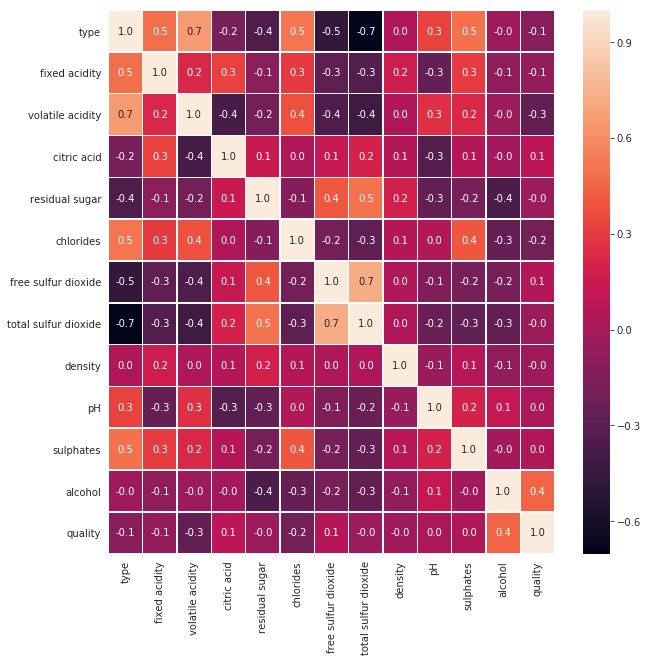

In [13]:
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

In [14]:
df['score'] = pd.cut(df['quality'], bins=[0, 2, 4, 6, 8, 10], include_lowest=True, labels=['E', 'D', 'C', 'B', 'A'], right=True).tolist()

In [15]:
cols = df.columns[1:12]
len(cols)

11

/home/eliane/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:198: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/home/eliane/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/eliane/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:898: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


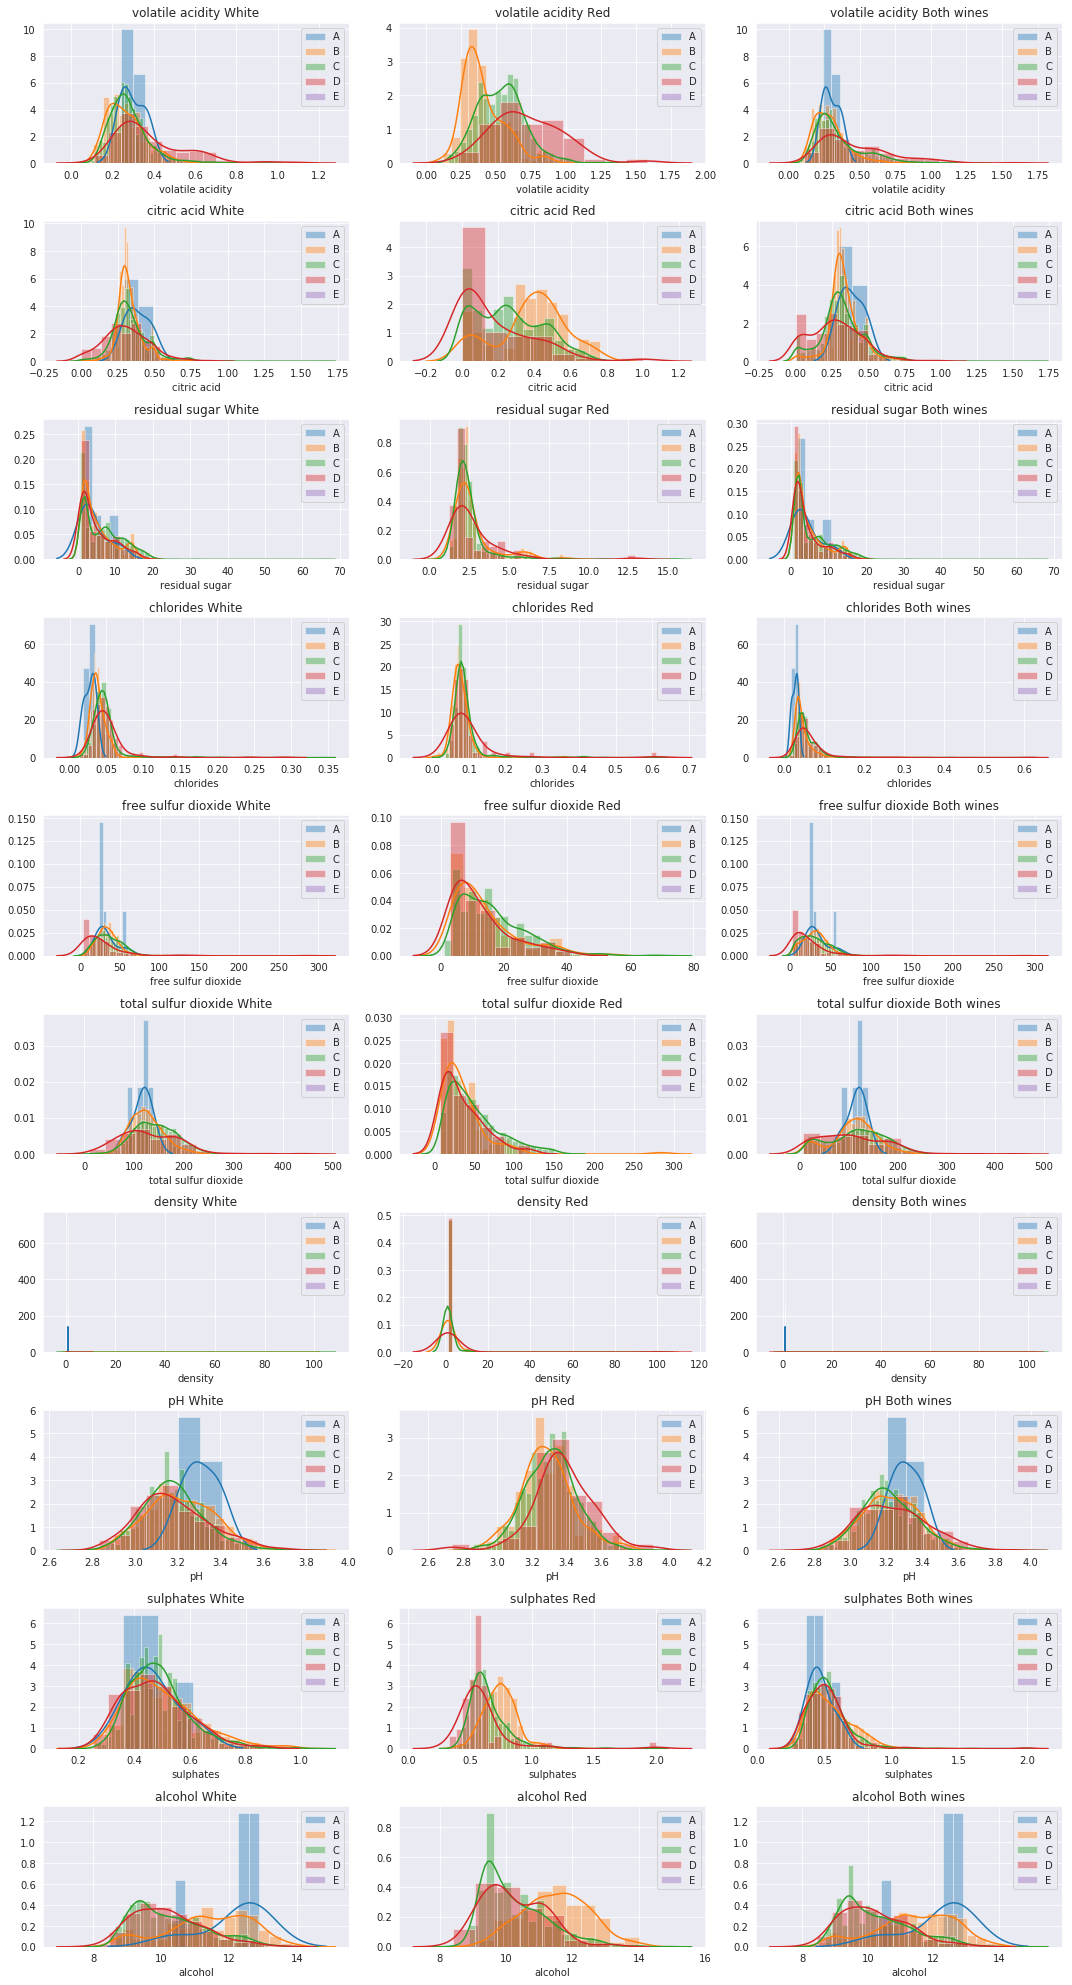

In [16]:
plt.figure(figsize=(15, 30))

for i in range(1, len(cols)):
    col = cols[i]
    plt.subplot(11, 3, 3*i-2)
    sns.distplot(df.loc[(df['score'] == 'A') & (df['type'] == 0)][col], label = 'A')
    sns.distplot(df.loc[(df['score'] == 'B') & (df['type'] == 0)][col], label = 'B')
    sns.distplot(df.loc[(df['score'] == 'C') & (df['type'] == 0)][col], label = 'C')
    sns.distplot(df.loc[(df['score'] == 'D') & (df['type'] == 0)][col], label = 'D')
    sns.distplot(df.loc[(df['score'] == 'E') & (df['type'] == 0)][col], label = 'E')
    plt.legend()
    plt.tight_layout()
    plt.title(col+" White")
    
    
    plt.subplot(11, 3, 3*i-1)
    sns.distplot(df.loc[(df['score'] == 'A') & (df['type'] == 1)][col], label = 'A')
    sns.distplot(df.loc[(df['score'] == 'B') & (df['type'] == 1)][col], label = 'B')
    sns.distplot(df.loc[(df['score'] == 'C') & (df['type'] == 1)][col], label = 'C')
    sns.distplot(df.loc[(df['score'] == 'D') & (df['type'] == 1)][col], label = 'D')
    sns.distplot(df.loc[(df['score'] == 'E') & (df['type'] == 1)][col], label = 'E')
    plt.legend()
    plt.tight_layout()
    plt.title(col+" Red")
    
    
    plt.subplot(11, 3, 3*i)
    sns.distplot(df.loc[df['score'] == 'A'][col], label = 'A')
    sns.distplot(df.loc[df['score'] == 'B'][col], label = 'B')
    sns.distplot(df.loc[df['score'] == 'C'][col], label = 'C')
    sns.distplot(df.loc[df['score'] == 'D'][col], label = 'D')
    sns.distplot(df.loc[df['score'] == 'E'][col], label = 'E')
    plt.legend()
    plt.tight_layout()
    plt.title(col+" Both wines")


plt.show()

In [17]:
df_red = df.loc[df['type'] == 1]
df_white = df.loc[df['type'] == 0]

In [18]:
df.iloc[1, 0:12]

type                        0
fixed acidity             6.3
volatile acidity          0.3
citric acid              0.34
residual sugar            1.6
chlorides               0.049
free sulfur dioxide        14
total sulfur dioxide      132
density                 0.994
pH                        3.3
sulphates                0.49
alcohol                   9.5
Name: 1, dtype: object

In [19]:
df.iloc[1, 12:14]

quality    6
score      C
Name: 1, dtype: object

In [20]:
X = df.iloc[:, 0:12].values  
y = df.iloc[:, 12].values

In [21]:
df.iloc[:, 0].values  

array([0, 0, 0, ..., 1, 1, 1])

In [22]:
from scipy import stats

y = df_red.iloc[:, 12].values


for i in range(12):
    print(df.columns[i])
    print(stats.spearmanr(df_red.iloc[:, i].values,y))
    print(" ")

type
SpearmanrResult(correlation=nan, pvalue=nan)
 
fixed acidity
SpearmanrResult(correlation=0.11787186945674616, pvalue=2.4605189908842224e-06)
 
volatile acidity
SpearmanrResult(correlation=-0.3842924731359218, pvalue=4.4493758493015984e-57)
 
citric acid
SpearmanrResult(correlation=0.21663832435833477, pvalue=2.484336753737574e-18)
 
residual sugar
SpearmanrResult(correlation=0.033524128799986, pvalue=0.181656692594101)
 
chlorides
SpearmanrResult(correlation=-0.18870381734528113, pvalue=3.338247892179934e-14)
 
free sulfur dioxide
SpearmanrResult(correlation=-0.0594792235555169, pvalue=0.017729949265929596)
 
total sulfur dioxide
SpearmanrResult(correlation=-0.20050762693707852, pvalue=7.118514862561517e-16)
 
density
SpearmanrResult(correlation=-0.17541490146115177, pvalue=1.900479878671669e-12)
 
pH
SpearmanrResult(correlation=-0.04457315146541122, pvalue=0.0756882167234937)
 
sulphates
SpearmanrResult(correlation=0.37686659047295984, pvalue=8.600129579368416e-55)
 
alcohol
Spea

/home/eliane/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/eliane/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/eliane/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/eliane/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/eliane/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [23]:
X

array([[ 0.   ,  7.   ,  0.27 , ...,  3.   ,  0.45 ,  8.8  ],
       [ 0.   ,  6.3  ,  0.3  , ...,  3.3  ,  0.49 ,  9.5  ],
       [ 0.   ,  8.1  ,  0.28 , ...,  3.26 ,  0.44 , 10.1  ],
       ...,
       [ 1.   ,  6.3  ,  0.51 , ...,  3.42 ,  0.75 , 11.   ],
       [ 1.   ,  5.9  ,  0.645, ...,  3.57 ,  0.71 , 10.2  ],
       [ 1.   ,  6.   ,  0.31 , ...,  3.39 ,  0.66 , 11.   ]])

In [24]:
# Feature Selection with Univariate Statistical Tests
from pandas import read_csv
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
# load data

X = df_red.iloc[:, 1:12].values
Y = df_red.iloc[:, 13].values
# feature extraction
test = SelectKBest(score_func=f_classif, k=4)
fit = test.fit(X, Y)
# summarize scores
set_printoptions(precision=3)
scores = fit.scores_
print(scores)
features = fit.transform(X)
# summarize selected features
#print(features[0:5,:])

[1.406e+01 1.025e+02 4.566e+01 2.428e+00 8.038e+00 9.226e+00 2.214e+01
 8.576e-02 9.815e+00 3.572e+01 1.565e+02]


In [25]:
for i in range(len(scores)):
    print(df.columns[1:12][i])
    print(scores[i])
    print("\n")

fixed acidity
14.059972803577272


volatile acidity
102.51470308820251


citric acid
45.65646004641606


residual sugar
2.4276014461017903


chlorides
8.03774483494536


free sulfur dioxide
9.22557311674736


total sulfur dioxide
22.139861742055132


density
0.08575714661831745


pH
9.814738415578223


sulphates
35.71696523985596


alcohol
156.47075257469288




In [30]:
# stats.spearmanr(df_red.iloc[:, i].values,y))
# feature_selection.f_regression(X, y, center=True)[source]

from sklearn.feature_selection import f_regression

raw_scores, p_values = f_regression(df_red.iloc[:, 1:12].values, df_red.iloc[:, 12].values)

print(raw_scores, p_values)

[2.609e+01 2.912e+02 8.803e+01 3.251e-01 2.638e+01 4.348e+00 5.827e+01
 1.033e+00 5.538e+00 1.067e+02 4.681e+02] [3.662e-07 4.478e-60 2.145e-20 5.686e-01 3.157e-07 3.722e-02 3.927e-14
 3.097e-01 1.873e-02 2.940e-24 3.575e-91]


In [31]:
for i in range(len(scores)):
    print(df.columns[1:12][i])
    print(raw_scores[i], p_values[i])
    print("\n")

fixed acidity
26.08503042057876 3.6617938302367145e-07


volatile acidity
291.1859956479333 4.478206050791487e-60


citric acid
88.03403565371144 2.1454141110160982e-20


residual sugar
0.32513349427176236 0.5686195261364897


chlorides
26.376011628992103 3.157342128442514e-07


free sulfur dioxide
4.347730992736065 0.03721776433631813


total sulfur dioxide
58.26696391345821 3.92705018961335e-14


density
1.03259904310828 0.309703898765184


pH
5.53785658468912 0.018730795599031173


sulphates
106.72709456127753 2.940492112035915e-24


alcohol
468.06081781811577 3.575453854402675e-91


